In [40]:
from qiskit import QuantumCircuit,transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [41]:
dataset = ["Alice", "Bob", "Charlie", "David", "Eve", "Frank", "Grace", "Heidi",
           "Ivan", "Judy", "Kate", "Liam", "Mallory", "Nancy", "Oscar", "Peggy",
           "Quinn", "Rose", "Steve", "Tina"]

In [42]:
target = input("Enter the name to find: ")
if target not in dataset:
    print(f"Error: '{target}' not in dataset.")
    exit()


In [43]:
n = 5
aux = 1
qc = QuantumCircuit(n + aux, n)

In [44]:
qc.h(range(n))

In [45]:
iterations = 3
for _ in range(iterations):
    for idx, item in enumerate(dataset):
        if item == target:
            binary = format(idx, f'0{n}b')
            for i, bit in enumerate(binary):
                if bit == '0':
                    qc.x(i)
            qc.mcx(list(range(n)), n)
            for i, bit in enumerate(binary):
                if bit == '0':
                    qc.x(i)

    # Diffusion operator
    qc.h(range(n))
    qc.x(range(n))
    qc.mcx(list(range(n)), n)
    qc.x(range(n))
    qc.h(range(n))


In [46]:
qc.measure(range(n), range(n))

In [47]:
print(qc.draw())

     ┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐     ┌───┐┌───┐┌───┐»
q_0: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├»
     ├───┤└───┘  │  ├───┤├───┤└───┘  │  ├───┤├───┤└───┘  │  ├───┤├───┤└───┘»
q_1: ┤ H ├───────■──┤ H ├┤ X ├───────■──┤ X ├┤ H ├───────■──┤ H ├┤ X ├─────»
     ├───┤       │  ├───┤├───┤       │  ├───┤├───┤       │  ├───┤├───┤     »
q_2: ┤ H ├───────■──┤ H ├┤ X ├───────■──┤ X ├┤ H ├───────■──┤ H ├┤ X ├─────»
     ├───┤       │  ├───┤├───┤       │  ├───┤├───┤       │  ├───┤├───┤     »
q_3: ┤ H ├───────■──┤ H ├┤ X ├───────■──┤ X ├┤ H ├───────■──┤ H ├┤ X ├─────»
     ├───┤┌───┐  │  ├───┤├───┤┌───┐  │  ├───┤├───┤┌───┐  │  ├───┤├───┤┌───┐»
q_4: ┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├──■──┤ X ├┤ H ├┤ X ├»
     └───┘└───┘┌─┴─┐└───┘└───┘└───┘┌─┴─┐└───┘└───┘└───┘┌─┴─┐└───┘└───┘└───┘»
q_5: ──────────┤ X ├───────────────┤ X ├───────────────┤ X ├───────────────»
               └───┘               └───┘               └───┘               »

In [48]:
simulator = AerSimulator()
transpiled_circuit = transpile(qc, simulator)
job = simulator.run(transpiled_circuit, shots=1000)
result = job.result()
counts = result.get_counts()

In [49]:
mapped_counts = {dataset[int(k, 2)]: v for k, v in counts.items() if int(k, 2) < len(dataset)}

In [50]:
max_state = max(counts, key=counts.get)
max_name = dataset[int(max_state, 2)] if int(max_state, 2) < len(dataset) else "Invalid"

In [51]:
print(f"Most likely found: '{max_name}' (state: {max_state})")
print("Mapped counts:", mapped_counts)

Most likely found: 'Oscar' (state: 01110)
Mapped counts: {'Liam': 18, 'Rose': 16, 'Nancy': 15, 'Frank': 15, 'Steve': 20, 'Mallory': 16, 'Bob': 18, 'Charlie': 16, 'Peggy': 15, 'Oscar': 446, 'Tina': 18, 'Judy': 26, 'Eve': 17, 'Kate': 14, 'Heidi': 17, 'Grace': 22, 'Alice': 25, 'Quinn': 20, 'David': 14, 'Ivan': 18}


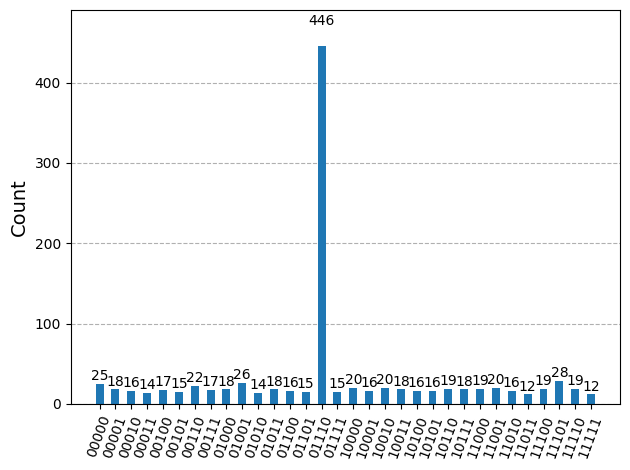

In [52]:
plot_histogram(counts)